# SVN_n_NN
willarevalo.developer@gmail.com

In [1]:
import numpy as np # For numeric operation
import pandas as pd # For Tabular information
import matplotlib.pyplot as plt # For draw plots
%matplotlib inline
import sklearn as sk # For Machine Learnig Algorithms
import kaggle # For download dataset with api
import missingno as msno # Tools for missing values

print(f'numpy v.{np.__version__}\npandas v.{pd.__version__}\nsklearn v.{sk.__version__}\nmissingno v.{msno.__version__}')


numpy v.1.18.1
pandas v.1.0.5
sklearn v.0.22.1
missingno v.0.4.2


## EDA

In [2]:
# Download Dataset
#https://www.kaggle.com/iabhishekofficial/mobile-price-classification/train.csv
kaggle.api.dataset_download_cli('iabhishekofficial/mobile-price-classification', path='www.kaggle.com/iabhishekofficial/mobile-price-classification', unzip=True)
mobile_test = pd.read_csv(r".\www.kaggle.com\iabhishekofficial\mobile-price-classification\test.csv")

mobile_train = pd.read_csv(r".\www.kaggle.com\iabhishekofficial\mobile-price-classification\train.csv")
thread = kaggle.api.datasets_view('iabhishekofficial','mobile-price-classification',async_req=True)
result = thread.get()
result

100%|██████████| 70.6k/70.6k [00:00<00:00, 4.63MB/s]

{'id': 11167,
 'ref': 'iabhishekofficial/mobile-price-classification',
 'subtitle': 'classify mobile price range',
 'tags': [{'ref': 'business',
   'competitionCount': 1,
   'datasetCount': 9984,
   'description': 'Businesses are organizational entities that drive economic activity. Explore the inner workings of things like HR practices, product sales, and customer happiness in these competitions, kernels, and datasets.',
   'fullPath': 'society and social sciences > society > business',
   'isAutomatic': False,
   'name': 'business',
   'scriptCount': 125,
   'totalCount': 10110},
  {'ref': 'classification',
   'competitionCount': 2,
   'datasetCount': 628,
   'description': None,
   'fullPath': 'machine learning > classification',
   'isAutomatic': False,
   'name': 'classification',
   'scriptCount': 5801,
   'totalCount': 6431},
  {'ref': 'mobile phones',
   'competitionCount': 0,
   'datasetCount': 225,
   'description': None,
   'fullPath': 'technology and applied sciences > comp

In [3]:
# Shape
print(f"""mobile_test have {mobile_test.shape[0]} rows by {mobile_test.shape[1]} columns
mobile_train have {mobile_train.shape[0]} rows by {mobile_train.shape[1]} columns""")

mobile_test have 1000 rows by 21 columns
mobile_train have 2000 rows by 21 columns


In [4]:
pd.set_option('display.max_columns', 30) #Configurando para que se muestren maximo 30 columnas
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#Show info about Dataframe
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Description Number
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
mobile_train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

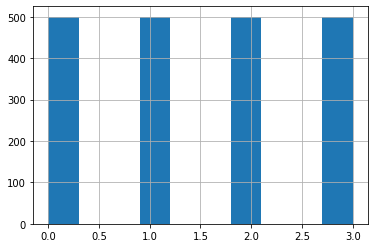

In [8]:
mobile_train.price_range.hist()

Target have values with same frecuency

## Correlation

In [9]:
# Correlation number columns
corr = mobile_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.00,0.01,0.01,-0.04,0.03,0.02,-0.00,0.03,0.00,-0.03,0.03,0.01,-0.01,-0.00,-0.03,-0.02,0.05,0.01,-0.01,-0.01,0.20
blue,0.01,1.00,0.02,0.04,0.00,0.01,0.04,0.00,-0.01,0.04,-0.01,-0.01,-0.04,0.03,-0.00,0.00,0.01,-0.03,0.01,-0.02,0.02
clock_speed,0.01,0.02,1.00,-0.00,-0.00,-0.04,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.01,-0.01,-0.05,0.02,-0.02,-0.01
dual_sim,-0.04,0.04,-0.00,1.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.02,-0.02,-0.02,0.01,0.04,-0.01,-0.02,-0.04,-0.01,-0.02,0.02,0.02
fc,0.03,0.00,-0.00,-0.03,1.00,-0.02,-0.03,-0.00,0.02,-0.01,0.64,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.01,0.02,0.02
four_g,0.02,0.01,-0.04,0.00,-0.02,1.00,0.01,-0.00,-0.02,-0.03,-0.01,-0.02,0.01,0.01,0.03,0.04,-0.05,0.58,0.02,-0.02,0.01
int_memory,-0.00,0.04,0.01,-0.02,-0.03,0.01,1.00,0.01,-0.03,-0.03,-0.03,0.01,-0.01,0.03,0.04,0.01,-0.00,-0.01,-0.03,0.01,0.04
m_dep,0.03,0.00,-0.01,-0.02,-0.00,-0.00,0.01,1.00,0.02,-0.00,0.03,0.03,0.02,-0.01,-0.03,-0.02,0.02,-0.01,-0.00,-0.03,0.00
mobile_wt,0.00,-0.01,0.01,-0.01,0.02,-0.02,-0.03,0.02,1.00,-0.02,0.02,0.00,0.00,-0.00,-0.03,-0.02,0.01,0.00,-0.01,-0.00,-0.03
n_cores,-0.03,0.04,-0.01,-0.02,-0.01,-0.03,-0.03,-0.00,-0.02,1.00,-0.00,-0.01,0.02,0.00,-0.00,0.03,0.01,-0.01,0.02,-0.01,0.00


## Handling Data

In [10]:
mobile_train.notnull().apply(pd.Series.value_counts)
# When False have a number is for this column have nulls, like LotFrontage have nulls

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
True,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


In [11]:
 mobile_train.isnull().any().value_counts()

False    21
dtype: int64

We haven't features with nulls

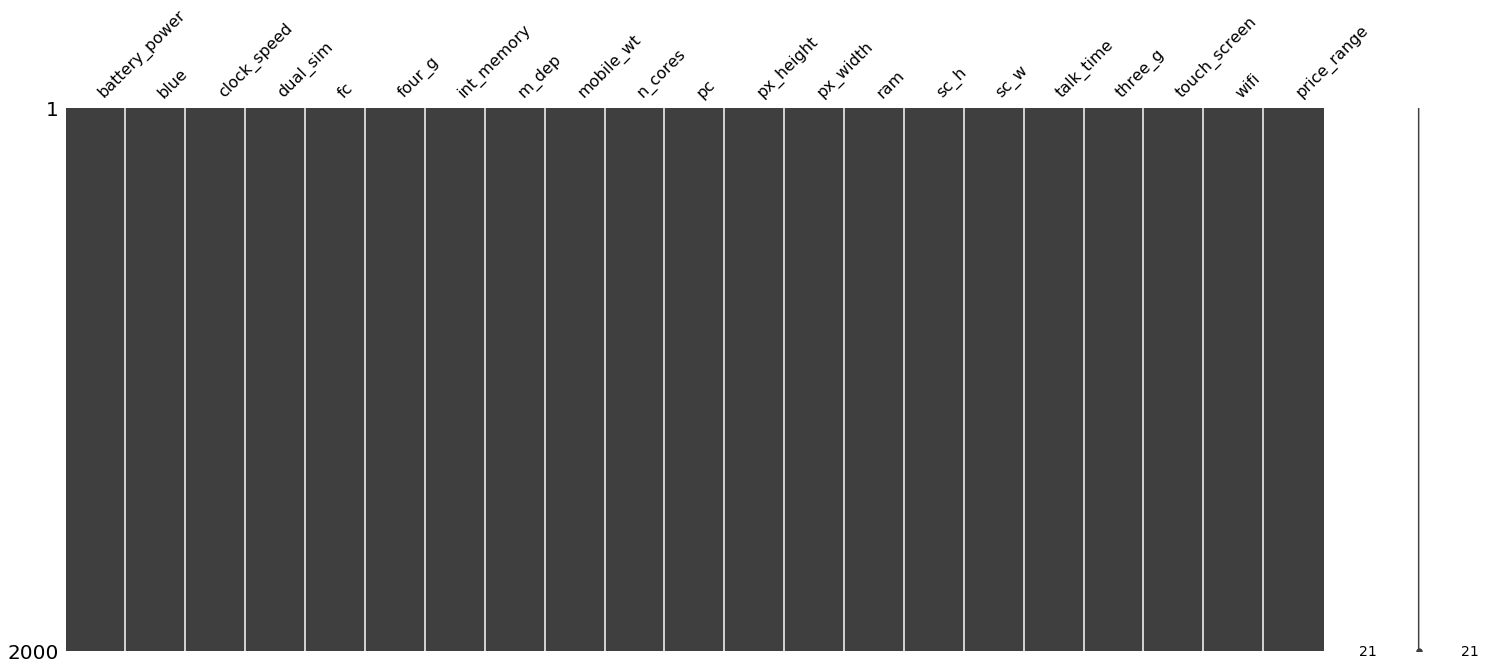

In [12]:
msno.matrix(mobile_train);

#### Split the data

In [13]:
# Features and target
X = mobile_train.drop(['price_range'], axis=1)
y = mobile_train[['price_range']]

print(f"""X shape {X.shape}
y shape {y.shape}""")


# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)


print(f"""X_train shape {X_train.shape}
y_train shape {y_train.shape}
X_test shape {X_test.shape}
y_test shape {y_test.shape}""")

X shape (2000, 20)
y shape (2000, 1)
X_train shape (1400, 20)
y_train shape (1400, 1)
X_test shape (600, 20)
y_test shape (600, 1)


__Best features for classifier models__

('battery_power', 0.018969559781668366)
('blue', 0.0057164918749021965)
('clock_speed', 0.0)
('dual_sim', 0.0)
('fc', 0.0)
('four_g', 0.0)
('int_memory', 0.016816694189446757)
('m_dep', 0.02108393325970148)
('mobile_wt', 0.0)
('n_cores', 0.0)
('pc', 0.0)
('px_height', 0.01913971903383782)
('px_width', 0.0002967918616114673)
('ram', 0.8572589601176706)
('sc_h', 0.0029315516547443465)
('sc_w', 0.0)
('talk_time', 0.0)
('three_g', 0.0)
('touch_screen', 0.022245760009100835)
('wifi', 0.0016387934777339908)


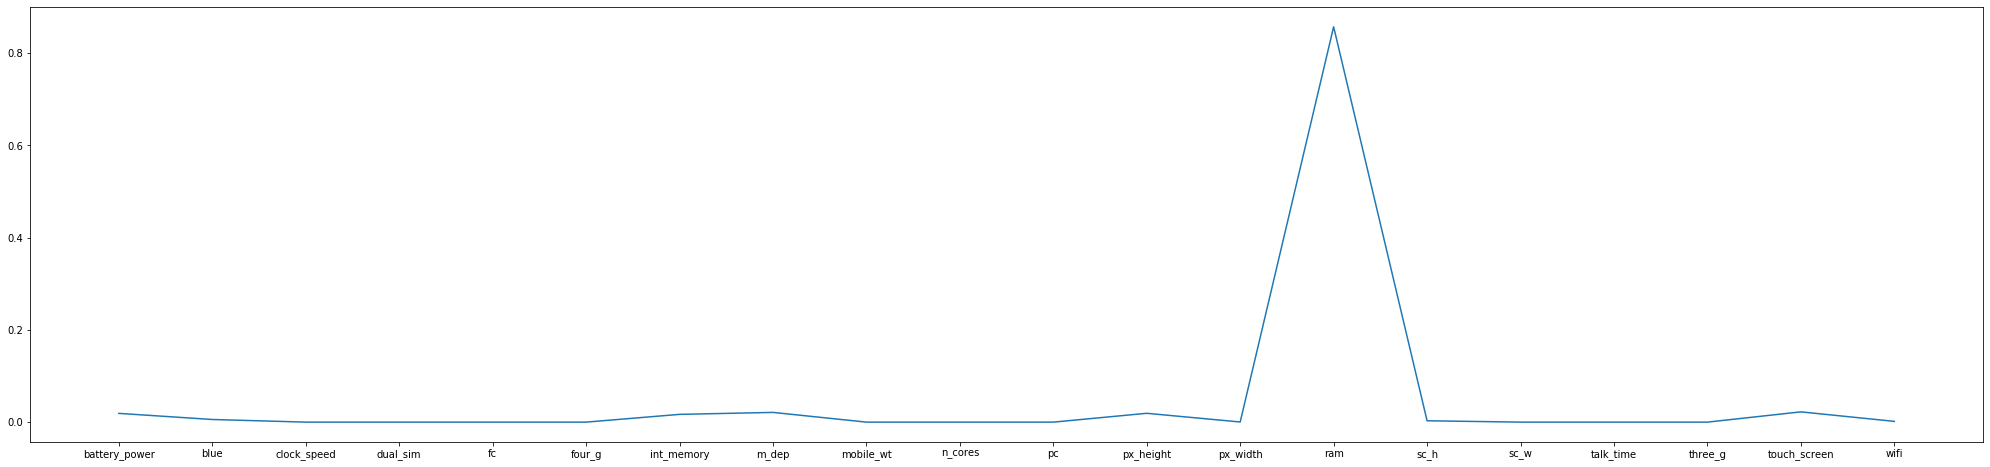

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
clf_selector = SelectKBest(mutual_info_regression, k=10)
clf_selector.fit(X_train,y_train['price_range'])
clf_scores = clf_selector.scores_


plt.rcParams["figure.figsize"] = [35,8]
plt.plot(clf_scores)
plt.xticks(np.arange(20),list(X.columns));
print(*dict(zip(X.columns,clf_scores)).items(), sep='\n')

Ram is very important feature for the predictor

In [15]:
clf_best_cols = [X_train.columns[i] for i,j in enumerate(clf_scores) if j > 0.02]
clf_best_cols

['m_dep', 'ram', 'touch_screen']

## Modeling

In [16]:
from sklearn.model_selection import GridSearchCV

### SVM

In [17]:
from sklearn.svm import SVC

In [18]:
final_model = SVC(C=0.25, degree=1, kernel= 'linear')

In [19]:
final_model.fit(X=X_train, y=y_train['price_range'])

SVC(C=0.25, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
lista_val=[[1025.0, 0.0, 1.0, 0.0, 1.0, 0.0, 8.0, 1.0, 180.0, 6.0, 16.0,1280.0,1280.0, 4084.0,6.0,1.0,12.0,0.0,1.0,1.0]]

In [21]:
final_model.predict(lista_val)

array([3], dtype=int64)

In [22]:
mobile_train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [23]:
X_test.iloc[15]

battery_power    1052.0
blue                0.0
clock_speed         0.9
dual_sim            0.0
fc                  1.0
four_g              0.0
int_memory          6.0
m_dep               0.8
mobile_wt         195.0
n_cores             4.0
pc                 16.0
px_height        1191.0
px_width         1839.0
ram               552.0
sc_h                6.0
sc_w                1.0
talk_time          11.0
three_g             0.0
touch_screen        0.0
wifi                1.0
Name: 1813, dtype: float64

In [24]:
SVC_parameters = {'C':np.linspace(0.25,1.0,4), 'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':range(1,6,2)}

In [25]:
# Train with all features

SVC1 = GridSearchCV(SVC(), SVC_parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
SVC1.fit(X=X_train, y=y_train['price_range'])
SVC_model1 = SVC1.best_estimator_
print('Best SVC1 ', SVC1.best_score_, SVC1.best_params_) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  2.9min finished


Best SVC1  0.9721428571428572 {'C': 0.25, 'degree': 1, 'kernel': 'linear'}


In [26]:
# Train with only best features

SVC2 = GridSearchCV(SVC(), SVC_parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
SVC2.fit(X=X_train[clf_best_cols], y=y_train['price_range'])
SVC_model2 = SVC2.best_estimator_
print('Best SVC2 ', SVC2.best_score_, SVC2.best_params_) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  5.5min


Best SVC2  0.7607142857142857 {'C': 0.5, 'degree': 1, 'kernel': 'poly'}


[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  7.3min finished


With multidimentional algorithms, is very important more futures for divide and good classification in a multidimensional space

### NNs

In [27]:
from sklearn.neural_network import MLPClassifier

In [35]:
layers_list = []
layers = range(2, 6, 10)
neurons = range(5, 10, 20)
for i in layers:
    for j in neurons:
        layers_list.append((i,j))

In [36]:
NN_parameters = {'hidden_layer_sizes':layers_list,
                 'activation':['tanh', 'relu'],
                 'solver':['sgd','adam'],
                 'learning_rate':['constant','adaptive'],
                 'batch_size':[5,10,20,50],
                 'max_iter':[100,200,300,500]}

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
#Rescale
scaler.fit(X_train[X_train.columns])

X_train_scaled = X_train.copy()
X_train_scaled[X_train.columns] = scaler.transform(X_train[X_train.columns])


X_test_scaled = X_test.copy()
X_test_scaled[X_test.columns] = scaler.transform(X_test[X_test.columns])


In [43]:
# Train with all features

NNclf1 = GridSearchCV(MLPClassifier(early_stopping=True, tol=1e-6), NN_parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
NNclf1.fit(X=X_train_scaled, y=y_train['price_range'])
NNclf_model1 = NNclf1.best_estimator_
print('Best NNclf1 ', NNclf1.best_score_, NNclf1.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   50.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  1.8min finished


Best NNclf1  0.9571428571428571 {'activation': 'relu', 'batch_size': 20, 'hidden_layer_sizes': (2, 5), 'learning_rate': 'adaptive', 'max_iter': 300, 'solver': 'adam'}


In [44]:
# Train with only best corr features

NNclf2 = GridSearchCV(MLPClassifier(early_stopping=True, tol=1e-6), NN_parameters, n_jobs=4, cv=5, verbose=1) #5 kfolds
NNclf2.fit(X=X_train_scaled[clf_best_cols], y=y_train['price_range'])
NNclf_model2 = NNclf2.best_estimator_
print('Best NNclf2 ', NNclf2.best_score_, NNclf2.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:  1.4min finished


Best NNclf2  0.7485714285714286 {'activation': 'relu', 'batch_size': 20, 'hidden_layer_sizes': (2, 5), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}


### Comparison

In [56]:
pred_clf_SVC_all=SVC_model1.predict(X_test) # 1. Predict tree classifier with all features
pred_clf_SVC_best=SVC_model2.predict(X_test[clf_best_cols]) # 2. Predict tree classifier with only best features
pred_clf_NNclf_all=NNclf_model1.predict(X_test_scaled) # 3. Predict random forest classifier with all features
pred_clf_NNclf_best=NNclf_model2.predict(X_test_scaled[clf_best_cols]) # 4. Predict random forest classifier with only best features

In [57]:
predict_clf_dict = {'pred_clf_SVC_all':pred_clf_SVC_all,
                      'pred_clf_SVC_best':pred_clf_SVC_best,
                      'pred_clf_NNclf_all':pred_clf_NNclf_all,
                      'pred_clf_NNclf_best':pred_clf_NNclf_best}

In [58]:
from sklearn.metrics import (mean_squared_error,confusion_matrix, plot_confusion_matrix, f1_score)
from sklearn.metrics import classification_report

### Classifiers

In [64]:
# report
target_names = ['class 0', 'class 1', 'class 2', 'class 3']
for i,j in predict_clf_dict.items():
    print('_'*20,i,'_'*20)
    print(classification_report(y_test['price_range'], j, target_names=target_names))
    print('_'*60,'\n')

____________________ pred_clf_SVC_all ____________________
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       135
     class 1       0.95      0.96      0.96       149
     class 2       0.96      0.93      0.95       168
     class 3       0.96      0.99      0.97       148

    accuracy                           0.96       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.96      0.96       600

____________________________________________________________ 

____________________ pred_clf_SVC_best ____________________
              precision    recall  f1-score   support

     class 0       0.85      0.84      0.84       135
     class 1       0.66      0.69      0.68       149
     class 2       0.66      0.66      0.66       168
     class 3       0.82      0.80      0.81       148

    accuracy                           0.74       600
   macro avg       0.75      0.75      0.75       600
wei

In [65]:
clf_scores = dict()
for i,j in predict_clf_dict.items():
    clf_scores[i] = confusion_matrix(y_test['price_range'], j)

In [66]:
clf_scores

{'pred_clf_SVC_all': array([[133,   2,   0,   0],
        [  2, 143,   4,   0],
        [  0,   5, 157,   6],
        [  0,   0,   2, 146]], dtype=int64),
 'pred_clf_SVC_best': array([[113,  22,   0,   0],
        [ 19, 103,  27,   0],
        [  1,  30, 111,  26],
        [  0,   0,  29, 119]], dtype=int64),
 'pred_clf_NNclf_all': array([[132,   3,   0,   0],
        [ 25, 121,   3,   0],
        [  0,  17, 115,  36],
        [  0,   0,   5, 143]], dtype=int64),
 'pred_clf_NNclf_best': array([[118,  17,   0,   0],
        [ 29,  94,  26,   0],
        [  1,  31, 108,  28],
        [  0,   0,  27, 121]], dtype=int64)}

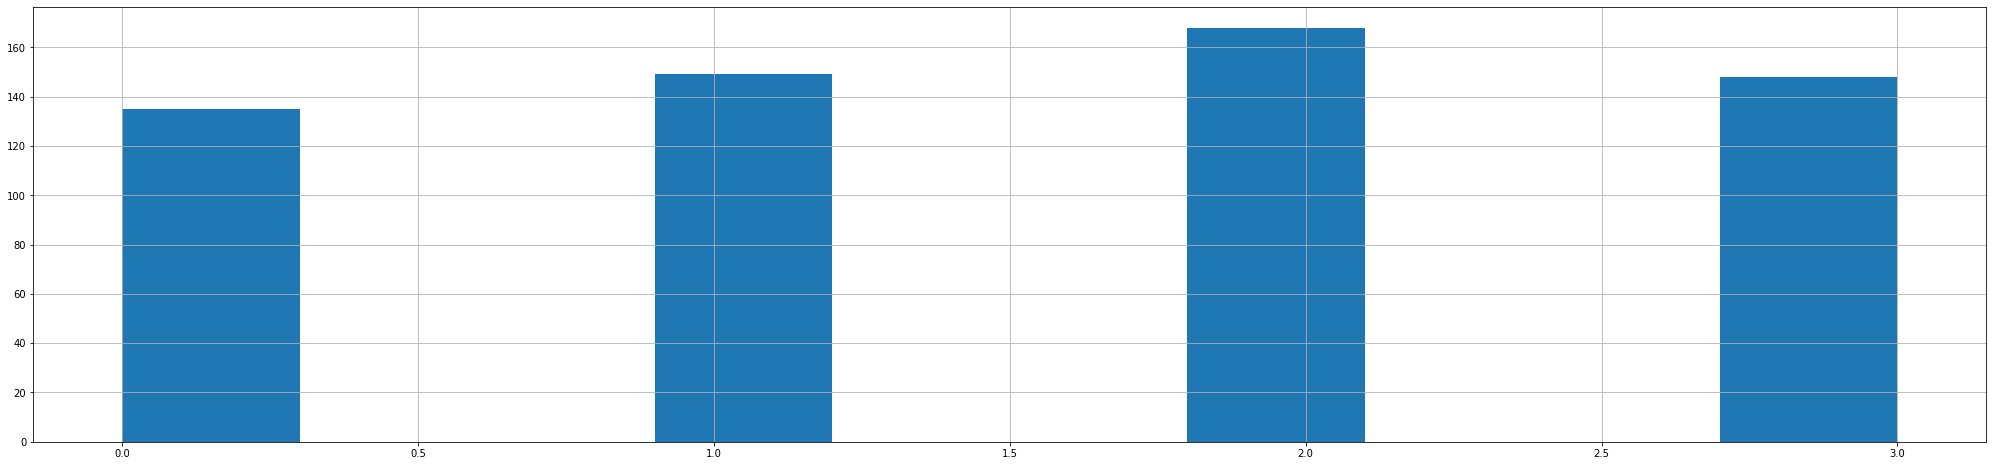

In [67]:
y_test['price_range'].hist();

### Conclusion

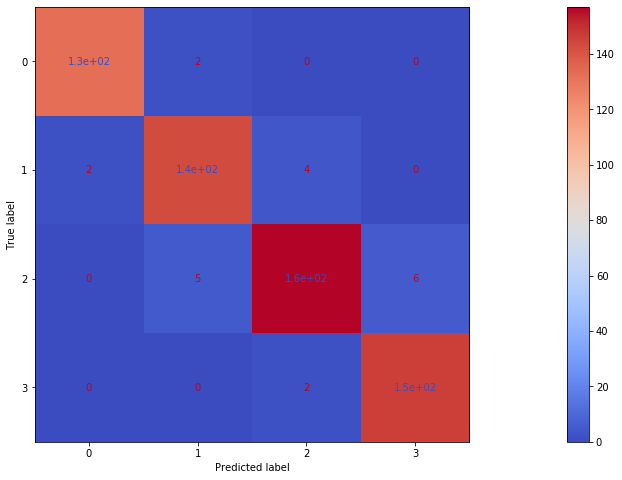

In [68]:
plot_confusion_matrix(SVC_model1, X_test, y_test['price_range'], cmap='coolwarm');

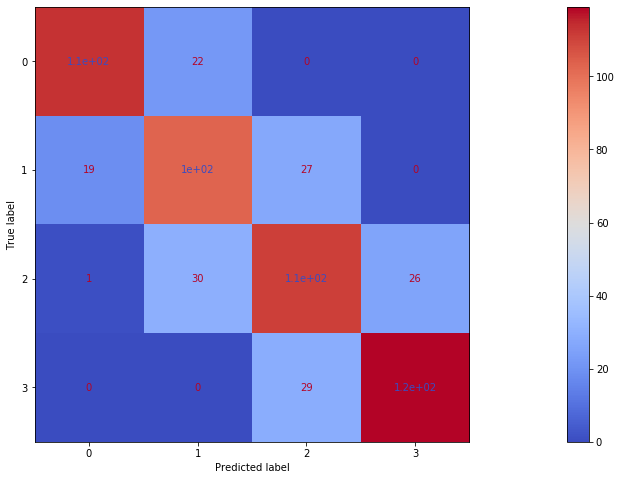

In [69]:
plot_confusion_matrix(SVC_model2, X_test[clf_best_cols], y_test['price_range'], cmap='coolwarm');

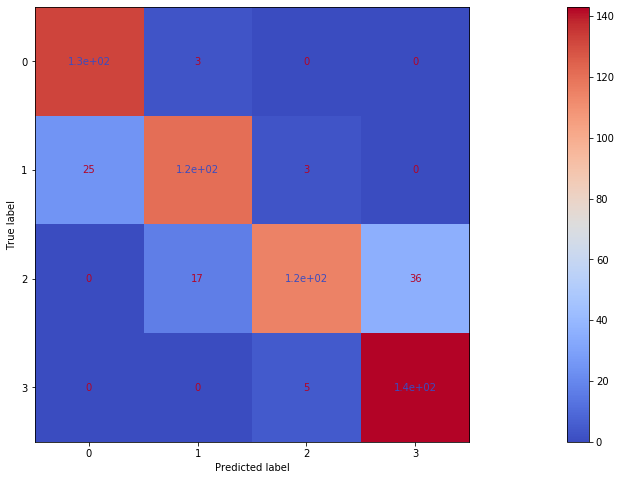

In [71]:
plot_confusion_matrix(NNclf_model1, X_test_scaled, y_test['price_range'], cmap='coolwarm');

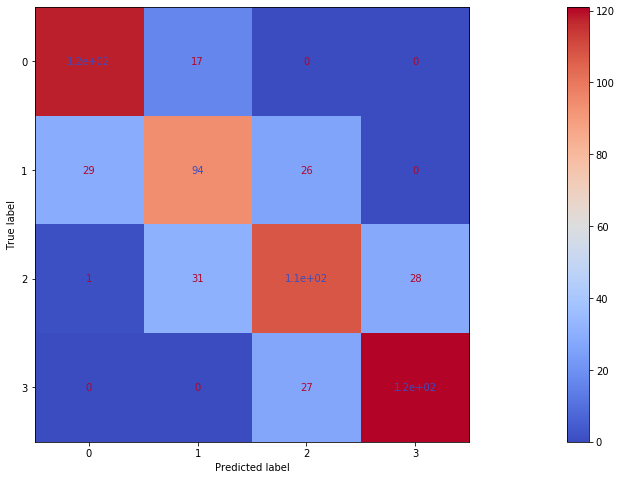

In [72]:
plot_confusion_matrix(NNclf_model2, X_test_scaled[clf_best_cols], y_test['price_range'], cmap='coolwarm');

In [73]:
f1_clf_scores = dict()
for i,j in predict_clf_dict.items():
    f1_clf_scores[i] = f1_score(y_test['price_range'], j, average='micro')

<BarContainer object of 4 artists>

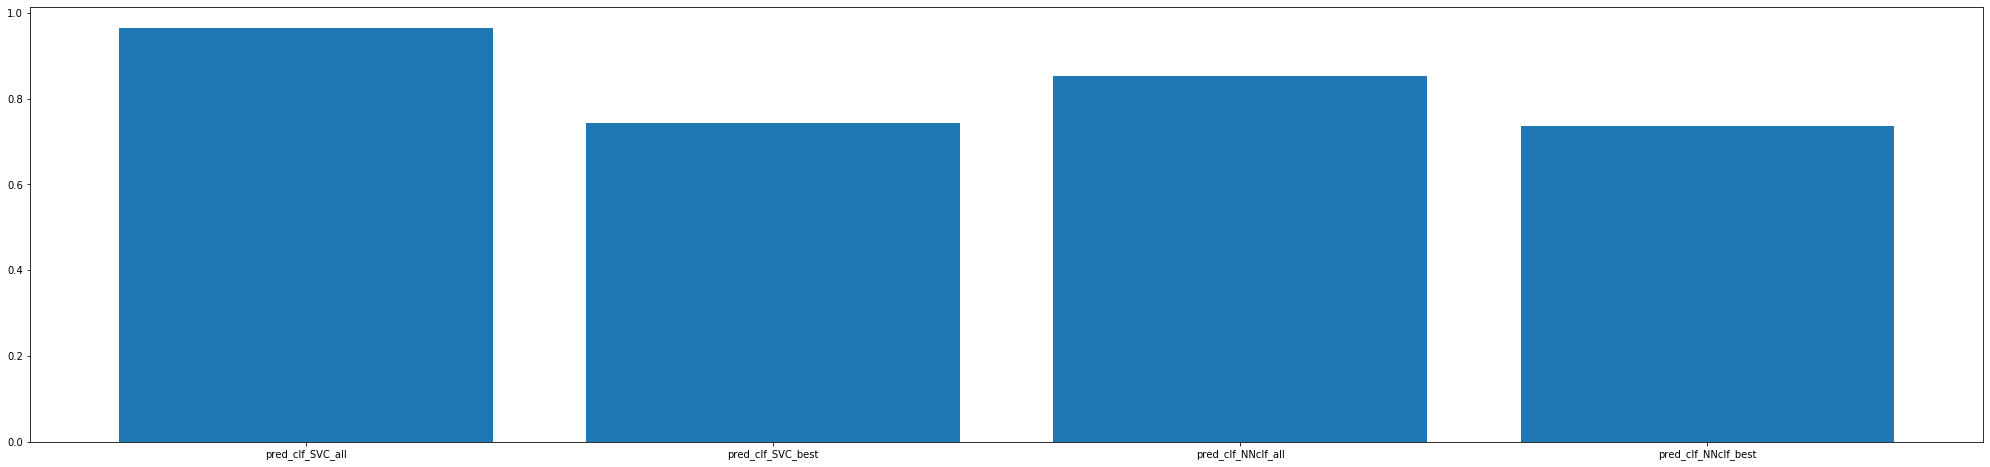

In [74]:
plt.bar(f1_clf_scores.keys(), f1_clf_scores.values())

In [75]:
print(*f1_clf_scores.items(), sep='\n')
print(f'Best classifier model is {max(f1_clf_scores, key=f1_clf_scores.get)}')

('pred_clf_SVC_all', 0.965)
('pred_clf_SVC_best', 0.7433333333333333)
('pred_clf_NNclf_all', 0.8516666666666667)
('pred_clf_NNclf_best', 0.735)
Best classifier model is pred_clf_SVC_all


___END___